In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
from apyori import apriori 


In [4]:
df= pd.read_csv("SLIIT_CODEFEST_Datathon_Final_Round/SLIIT_Final_Round/Sample_Dataset/telecom_churn.csv",header=None)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
2,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False
3,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False
4,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3332,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3334 entries, 0 to 3333
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3334 non-null   object
 1   1       3334 non-null   object
 2   2       3334 non-null   object
 3   3       3334 non-null   object
 4   4       3334 non-null   object
 5   5       3334 non-null   object
 6   6       3334 non-null   object
 7   7       3334 non-null   object
 8   8       3334 non-null   object
 9   9       3334 non-null   object
 10  10      3334 non-null   object
 11  11      3334 non-null   object
 12  12      3334 non-null   object
 13  13      3334 non-null   object
 14  14      3334 non-null   object
 15  15      3334 non-null   object
 16  16      3334 non-null   object
 17  17      3334 non-null   object
 18  18      3334 non-null   object
 19  19      3334 non-null   object
 20  20      3334 non-null   object
dtypes: object(21)
memory usage: 547.1+ KB


In [7]:
df.isnull().sum() 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [8]:
df.shape

(3334, 21)

In [9]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')

In [10]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [11]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 3334

Number of features: 21

Features:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Missing values: 0

Unique values:
0       52
1      213
2        4
3     3334
4        3
5        3
6       47
7     1668
8      120
9     1668
10    1612
11     124
12    1441
13    1592
14     121
15     934
16     163
17      22
18     163
19      11
20       3
dtype: int64


In [12]:
df = df.rename(columns=df.iloc[0])

In [13]:
df = df.iloc[1: , :]

In [14]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
2,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False
3,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False
4,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
5,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3332,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [15]:
pd.Series(df["phone number"]).is_unique

True

In [16]:
first_column = df.pop('phone number')
df.insert(0, 'phone number', first_column)

In [17]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 3333

Number of features: 21

Features:
['phone number', 'state', 'account length', 'area code', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']

Missing values: 0

Unique values:
phone number              3333
state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night c

In [18]:
trace = go.Pie(labels = df["churn"].value_counts().keys().tolist(),
               values = df["churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [19]:
trace = go.Pie(labels = df["international plan"].value_counts().keys().tolist(),
               values = df["international plan"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "International plan",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [20]:
trace = go.Pie(labels = df["voice mail plan"].value_counts().keys().tolist(),
               values = df["voice mail plan"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Voice mail plan",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [21]:
df

,phone number,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1,382-4657,KS,128,415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
2,371-7191,OH,107,415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False
3,358-1921,NJ,137,415,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False
4,375-9999,OH,84,408,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
5,330-6626,OK,75,415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,414-4276,AZ,192,415,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,370-3271,WV,68,415,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,328-8230,RI,28,510,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3332,364-6381,CT,184,510,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [22]:
df.columns

Index(['phone number', 'state', 'account length', 'area code',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [23]:
df.describe()

,phone number,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333,...,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333
unique,3333,51,212,3,2,2,46,1667,119,1667,...,123,1440,1591,120,933,162,21,162,10,2
top,405-2653,WV,105,415,no,no,0,174.5,102,26.18,...,105,14.25,188.2,105,9.45,10.0,3,2.7,1,False
freq,1,106,43,1655,3010,2411,2411,8,78,8,...,80,11,8,84,15,62,668,62,1181,2850


In [24]:
df.describe(include=["object", "bool"])

,phone number,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333,...,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333
unique,3333,51,212,3,2,2,46,1667,119,1667,...,123,1440,1591,120,933,162,21,162,10,2
top,405-2653,WV,105,415,no,no,0,174.5,102,26.18,...,105,14.25,188.2,105,9.45,10.0,3,2.7,1,False
freq,1,106,43,1655,3010,2411,2411,8,78,8,...,80,11,8,84,15,62,668,62,1181,2850


In [25]:
df.sort_values(by=["churn", "total day charge"], ascending=[True, False])

,phone number,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1352,388-9653,LA,13,415,no,no,0,58.4,121,9.93,...,64,22.29,159.0,115,7.15,11.9,5,3.21,1,False
2974,391-2334,NE,95,510,no,no,0,58.2,96,9.89,...,126,17.18,210.5,97,9.47,10.4,5,2.81,0,False
2860,415-3158,WV,87,415,no,no,0,58.0,125,9.86,...,116,5.74,185.9,136,8.37,11.5,3,3.11,0,False
604,346-5707,MI,53,415,no,no,0,57.5,95,9.78,...,131,22.57,244.3,128,10.99,11.6,6,3.13,3,False
736,406-5870,DC,169,415,yes,no,0,57.1,98,9.71,...,78,16.97,274.7,103,12.36,6.5,6,1.76,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,386-4170,KS,92,408,yes,no,0,62.6,111,10.64,...,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True
22,393-7984,CO,77,408,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
78,360-1171,NY,144,408,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True
1539,341-7686,WV,113,415,no,no,0,61.2,111,10.4,...,88,7.85,197.4,114,8.88,13.7,3,3.7,5,True


In [26]:
df['churn'] = df['churn'].map({'True': 1, 'False': 0})
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [27]:
df["churn"].mean()

0.14491449144914492

In [28]:
#check the data type
dataTypeObj = df.dtypes['total day minutes']
dataTypeObj

dtype('O')

In [29]:
#change to string 
df['account length'] = df['account length'].astype(str)
df['total day minutes'] = df['total day minutes'].astype(str)
df['total day charge'] = df['total day charge'].astype(str)
df['number vmail messages'] = df['number vmail messages'].astype(str)
df['total day calls'] = df['total day calls'].astype(str)
df['total eve minutes'] = df['total eve minutes'].astype(str)
df['total eve calls'] = df['total eve calls'].astype(str)
df['total eve charge'] = df['total eve charge'].astype(str)
df['total night minutes'] = df['total night minutes'].astype(str)
df['total night calls'] = df['total night calls'].astype(str)
df['total night charge'] = df['total night charge'].astype(str)
df['total intl minutes'] = df['total intl minutes'].astype(str)
df['total intl calls'] = df['total intl calls'].astype(str)
df['total intl charge'] = df['total intl charge'].astype(str)
df['customer service calls'] = df['customer service calls'].astype(str)

In [30]:
#change to float
df['account length'] = df['account length'].astype(float)
df['total day minutes'] = df['total day minutes'].astype(float)
df['total day charge'] = df['total day charge'].astype(float)
df['total day calls'] = df['total day calls'].astype(float)
df['number vmail messages'] = df['number vmail messages'].astype(float)
df['total eve minutes'] = df['total eve minutes'].astype(float)
df['total eve calls'] = df['total eve calls'].astype(float)
df['total eve charge'] = df['total eve charge'].astype(float)
df['total night minutes'] = df['total night minutes'].astype(float)
df['total night calls'] = df['total night calls'].astype(float)
df['total night charge'] = df['total night charge'].astype(float)
df['total intl minutes'] = df['total intl minutes'].astype(float)
df['total intl calls'] = df['total intl calls'].astype(float)
df['total intl charge'] = df['total intl charge'].astype(float)
df['customer service calls'] = df['customer service calls'].astype(float)

In [31]:
#change to int
df['account length'] = df['account length'].astype(int)
df['total day minutes'] = df['total day minutes'].astype(int)
df['total day charge'] = df['total day charge'].astype(int)
df['total day calls'] = df['total day calls'].astype(int)
df['number vmail messages'] = df['number vmail messages'].astype(int)
df['total eve minutes'] = df['total eve minutes'].astype(int)
df['total eve calls'] = df['total eve calls'].astype(int)
df['total eve charge'] = df['total eve charge'].astype(int)
df['total night minutes'] = df['total night minutes'].astype(int)
df['total night calls'] = df['total night calls'].astype(int)
df['total night charge'] = df['total night charge'].astype(int)
df['total intl minutes'] = df['total intl minutes'].astype(int)
df['total intl calls'] = df['total intl calls'].astype(int)
df['total intl charge'] = df['total intl charge'].astype(int)
df['customer service calls'] = df['customer service calls'].astype(int)

In [32]:
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
phone number              object
state                     object
account length             int32
area code                 object
international plan         int64
voice mail plan            int64
number vmail messages      int32
total day minutes          int32
total day calls            int32
total day charge           int32
total eve minutes          int32
total eve calls            int32
total eve charge           int32
total night minutes        int32
total night calls          int32
total night charge         int32
total intl minutes         int32
total intl calls           int32
total intl charge          int32
customer service calls     int32
churn                      int64
dtype: object


#### What are average values of numerical features for churned users?

In [33]:
df[df["churn"] == 1].mean()

account length            102.664596
area code                        inf
international plan          0.283644
voice mail plan             0.165631
number vmail messages       5.115942
total day minutes         206.472050
total day calls           101.335404
total day charge           34.693582
total eve minutes         211.946170
total eve calls           100.561077
total eve charge           17.556936
total night minutes       204.805383
total night calls         100.399586
total night charge          8.712215
total intl minutes         10.233954
total intl calls            4.163561
total intl charge           2.387164
customer service calls      2.229814
churn                       1.000000
dtype: float64

#### How much time (on average) do churned users spend on the phone during daytime?

In [34]:
df[df["churn"] == 1]["total day minutes"].mean()

206.472049689441

#### What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?

In [35]:
df[(df["churn"] == 0) & (df["international plan"] == "0")]["total intl minutes"].max()

nan

In [36]:
columns_to_show = ["total day minutes", "total eve minutes", "total night minutes"]
df.groupby(["churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

total day minutes                      total eve minutes             \
                   mean        std amin amax              mean        std   
churn                                                                       
0            174.726667  50.182258    0  315        198.590175  50.295125   
1            206.472050  68.985030    0  350        211.946170  51.733891   

                total night minutes                       
      amin amax                mean        std amin amax  
churn                                                     
0        0  361          199.679649  51.101749   23  395  
1       70  363          204.805383  47.120700   47  354

In [37]:
pd.crosstab(df["churn"], df["international plan"])

international plan,0,1
churn,,
0,2664,186
1,346,137


In [38]:
pd.crosstab(df["churn"], df["voice mail plan"], normalize=True)

voice mail plan,0,1
churn,,
0,0.602460,0.252625
1,0.120912,0.024002


In [39]:
df.pivot_table(["total day calls", "total eve calls", "total night calls"],["area code"],aggfunc="mean",)

,total day calls,total eve calls,total night calls
area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


In [40]:
total_calls = (df["total day calls"]+ df["total eve calls"]+ df["total night calls"]+ df["total intl calls"])
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
df.head()

,phone number,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total calls
1,382-4657,KS,128,415,0,1,25,265,110,45,...,16,244,91,11,10,3,2,1,0,303
2,371-7191,OH,107,415,0,1,26,161,123,27,...,16,254,103,11,13,3,3,1,0,332
3,358-1921,NJ,137,415,0,0,0,243,114,41,...,10,162,104,7,12,5,3,0,0,333
4,375-9999,OH,84,408,1,0,0,299,71,50,...,5,196,89,8,6,7,1,2,0,255
5,330-6626,OK,75,415,1,0,0,166,113,28,...,12,186,121,8,10,3,2,3,0,359


In [41]:
#df = df.drop(['total day calls','total eve calls','total night calls','total intl calls'], axis='columns')

In [358]:
df["Total charge"] = (df["total day charge"]+ df["total eve charge"]+ df["total night charge"]+ df["total intl charge"])
df.head()

,phone number,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total calls,Total charge
1,382-4657,KS,128,415,0,1,25,265,110,45,...,244,91,11,10,3,2,1,0,303,74
2,371-7191,OH,107,415,0,1,26,161,123,27,...,254,103,11,13,3,3,1,0,332,57
3,358-1921,NJ,137,415,0,0,0,243,114,41,...,162,104,7,12,5,3,0,0,333,61
4,375-9999,OH,84,408,1,0,0,299,71,50,...,196,89,8,6,7,1,2,0,255,64
5,330-6626,OK,75,415,1,0,0,166,113,28,...,186,121,8,10,3,2,3,0,359,50


In [386]:
#df = df.drop(['total day charge','total eve charge','total night charge','total intl charge'], axis='columns')

In [388]:
df["Total minutes"] = (df["total day minutes"]+ df["total eve minutes"]+ df["total night minutes"]+ df["total intl minutes"])
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls,Total calls,Total charge,churn,Total minutes
1,128,415,0,1,25,265,197,244,10,1,303,74,0,716
2,107,415,0,1,26,161,195,254,13,1,332,57,0,623
3,137,415,0,0,0,243,121,162,12,0,333,61,0,538
4,84,408,1,0,0,299,61,196,6,2,255,64,0,562
5,75,415,1,0,0,166,148,186,10,3,359,50,0,510


In [389]:
df = df.drop(['total day minutes','total eve minutes','total night minutes','total intl minutes'], axis='columns')

In [300]:
pd.crosstab(df["churn"], df["international plan"], margins=True)

international plan,0,1,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [301]:
# some imports to set up plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

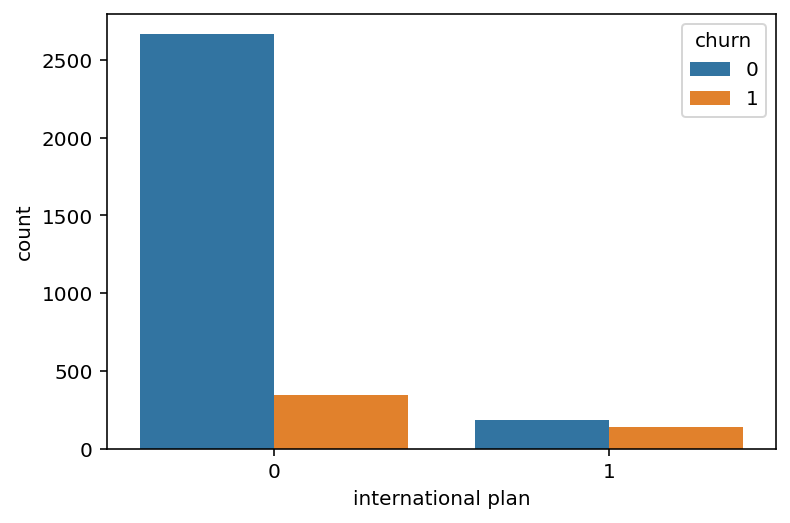

In [302]:
sns.countplot(x="international plan", hue="churn", data=df);

In [303]:
pd.crosstab(df["churn"], df["customer service calls"], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


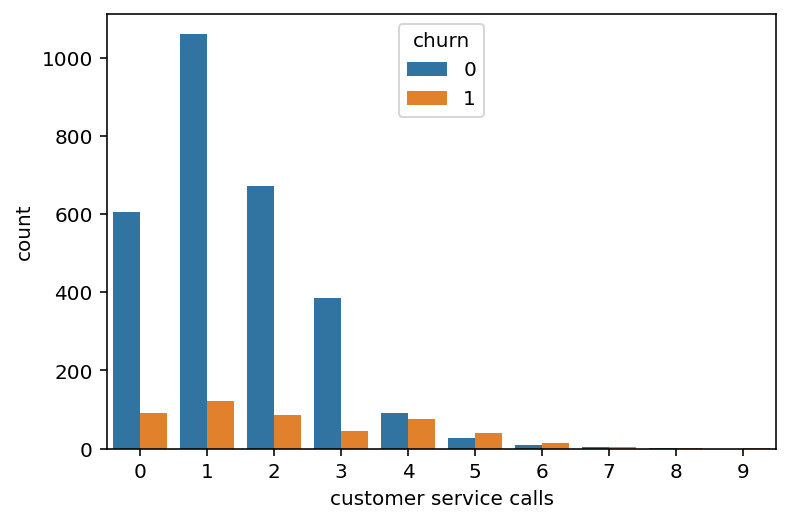

In [304]:
sns.countplot(x="customer service calls", hue="churn", data=df);

In [305]:
df["Many_service_calls"] = (df["customer service calls"] > 3).astype("int")
pd.crosstab(df["Many_service_calls"], df["churn"], margins=True)

churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


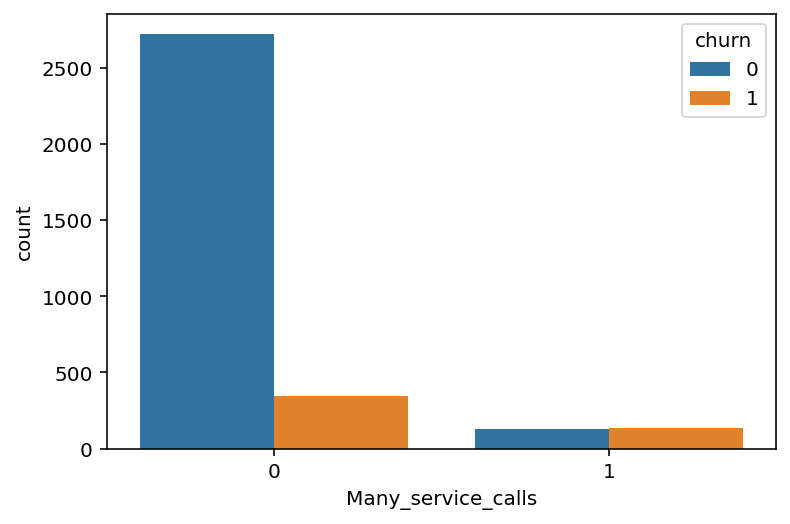

In [306]:
sns.countplot(x="Many_service_calls", hue="churn", data=df);

In [307]:
pd.crosstab(df["Many_service_calls"] & df["international plan"], df["churn"])

churn,0,1
row_0,,
0,2841,464
1,9,19


In [390]:
cols = list(df.columns.values) 
cols.pop(cols.index('churn'))
df = df[cols+['churn']] 

In [360]:
df = df.drop(['state'], axis='columns')

In [361]:
df = df.rename(columns = {'phone number': 'phone_number'}, inplace = False)

In [391]:
df

,account length,area code,international plan,voice mail plan,number vmail messages,customer service calls,Total calls,Total charge,Total minutes,churn
1,128,415,0,1,25,1,303,74,716,0
2,107,415,0,1,26,1,332,57,623,0
3,137,415,0,0,0,0,333,61,538,0
4,84,408,1,0,0,2,255,64,562,0
5,75,415,1,0,0,3,359,50,510,0
...,...,...,...,...,...,...,...,...,...,...
3329,192,415,0,1,36,2,292,58,659,0
3330,68,415,0,0,0,3,239,62,584,0
3331,28,510,0,0,0,2,264,65,673,0
3332,184,510,1,0,0,2,336,56,516,0


In [373]:
df = df.drop(['phone_number'], axis='columns')

In [374]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [375]:
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,Total calls,Total charge
1,128,415,0,1,25,265,110,45,197,99,16,244,91,11,10,3,2,1,303,74
2,107,415,0,1,26,161,123,27,195,103,16,254,103,11,13,3,3,1,332,57
3,137,415,0,0,0,243,114,41,121,110,10,162,104,7,12,5,3,0,333,61
4,84,408,1,0,0,299,71,50,61,88,5,196,89,8,6,7,1,2,255,64
5,75,415,1,0,0,166,113,28,148,122,12,186,121,8,10,3,2,3,359,50


In [376]:
y.tail()

3329    0
3330    0
3331    0
3332    0
3333    0
Name: churn, dtype: int64

In [377]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [378]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [379]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier()
RFclassifier.fit(X_train,y_train)

RandomForestClassifier()

In [383]:
# Prediction
y_pred=RFclassifier.predict(X_test)

In [384]:
# Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.965